In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses
import cv2
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
import numpy as np
from random import randint

In [ ]:
!rm extracted.zip digits.zip
!wget https://old.eutampieri.eu/extracted.zip
!rm -rf extracted digits
!unzip extracted.zip
!mv extracted digits

Output streaming troncato alle ultime 5000 righe.
  inflating: extracted/3_1_3263.jpg  
  inflating: extracted/3_1_3266.jpg  
  inflating: extracted/3_1_3267.jpg  
  inflating: extracted/3_1_3272.jpg  
  inflating: extracted/3_1_3274.jpg  
  inflating: extracted/3_1_3279.jpg  
  inflating: extracted/3_1_328.jpg   
  inflating: extracted/3_1_3283.jpg  
  inflating: extracted/3_1_3296.jpg  
  inflating: extracted/3_1_3297.jpg  
  inflating: extracted/3_1_3303.jpg  
  inflating: extracted/3_1_3322.jpg  
  inflating: extracted/3_1_3329.jpg  
  inflating: extracted/3_1_3336.jpg  
  inflating: extracted/3_1_3339.jpg  
  inflating: extracted/3_1_3354.jpg  
  inflating: extracted/3_1_3363.jpg  
  inflating: extracted/3_1_3370.jpg  
  inflating: extracted/3_1_3371.jpg  
  inflating: extracted/3_1_3378.jpg  
  inflating: extracted/3_1_3379.jpg  
  inflating: extracted/3_1_3382.jpg  
  inflating: extracted/3_1_3389.jpg  
  inflating: extracted/3_1_3390.jpg  
  inflating: extracted/3_1_3392.jpg  


In [ ]:
from glob import glob
dataset = [(cv2.imread(i, cv2.IMREAD_GRAYSCALE), int(i.split('/')[1].split('_')[0])) for i in glob('digits/*.jpg') if i.find("display") == -1]

In [ ]:
def pad_and_resize_image(image):
  width = 53
  #left = randint(0, (width - image.shape[1])//2)
  left = (width - image.shape[1])//2
  right = width-left-image.shape[1]
  return cv2.resize(cv2.copyMakeBorder(image, 0, 0, left, right, cv2.BORDER_CONSTANT), (32,32), interpolation=cv2.INTER_LINEAR)

In [ ]:
x = np.array([pad_and_resize_image(i[0]) for i in dataset])
y = np.array([10 if i[1] == 11 else i[1] for i in dataset])
x_train,x_test, y_train,y_test = train_test_split(x, y)


In [ ]:
y_train.shape


(8505,)

In [ ]:
x_test.shape

(2835, 32, 32)

In [ ]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([8505, 32, 32, 1])

In [ ]:
x_val = x_train[-1000:,:,:,:]
y_val = y_train[-1000:]
x_train = x_train[:-1000,:,:,:]
y_train = y_train[:-1000]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(11, activation='softmax'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             156 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 5, 5, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1, 1, 120)           │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 120)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             935 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 61,791 (241.37 KB)

 Trainable params: 61,791 (241.37 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epoch_count = 40
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train,validation_data=(x_val, y_val), batch_size=64, epochs=epoch_count, verbose=1)

Epoch 1/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 12s 46ms/step - accuracy: 0.3029 - loss: 2.1339 - val_accuracy: 0.3230 - val_loss: 2.0354
Epoch 2/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.3821 - loss: 1.8001 - val_accuracy: 0.4730 - val_loss: 1.4444
Epoch 3/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5163 - loss: 1.3645 - val_accuracy: 0.5620 - val_loss: 1.2680
Epoch 4/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5565 - loss: 1.2359 - val_accuracy: 0.5980 - val_loss: 1.1329
Epoch 5/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6019 - loss: 1.0912 - val_accuracy: 0.6480 - val_loss: 0.9930
Epoch 6/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6328 - loss: 0.9912 - val_accuracy: 0.6740 - val_loss: 0.8850
Epoch 7/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6725 - loss: 0.8787 - val_accuracy: 0.6850 - val_loss: 0.8284
Epoch 8/40
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6972 - loss: 0.7932 - val_accuracy: 

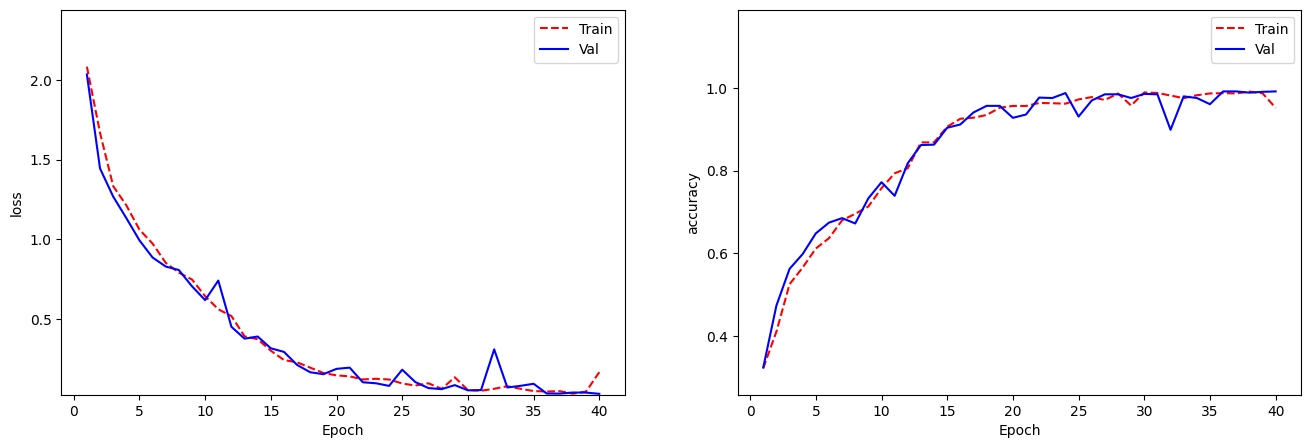

In [ ]:
indicator_list=['loss','accuracy']
#jaccard se l'intersezione fosse uguale all'unione, se i due insiemi fosse sovrapposti dovrebbe essere uguale a 1, puntiamo a far salire l'indeice

_, axs = plt.subplots(1,len(indicator_list),figsize=(8*len(indicator_list),5))

for idx,indicator in enumerate(indicator_list):
  minVal=min(np.amin(history.history[indicator]),np.amin(history.history['val_'+indicator]))
  maxVal=min(np.amax(history.history[indicator]),np.amax(history.history['val_'+indicator]))
  axs[idx].plot(range(1,epoch_count+1),history.history[indicator],'r--',label='Train')
  axs[idx].plot(range(1,epoch_count+1),history.history['val_'+indicator],'b-',label='Val')
  axs[idx].set_xlabel('Epoch')
  axs[idx].set_ylabel(indicator)
  axs[idx].set_ylim([minVal*0.8,maxVal*1.2])
  axs[idx].legend(loc='upper right')

In [ ]:
model.export('/content/modello1')

Saved artifact at '/content/modello1'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 32, 32, 1), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 11), dtype=tf.float32, name=None)
Captures:
  134902395566032: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902395566224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369340688: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369341456: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369340880: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369338960: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369342224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369340496: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369342416: TensorSpec(shape=(), dtype=tf.resource, name=None)
  134902369343952: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
!zip -r /content/modello1.zip /content/modello1

  adding: content/modello1/ (stored 0%)
  adding: content/modello1/saved_model.pb (deflated 85%)
  adding: content/modello1/assets/ (stored 0%)
  adding: content/modello1/fingerprint.pb (stored 0%)
  adding: content/modello1/variables/ (stored 0%)
  adding: content/modello1/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/modello1/variables/variables.index (deflated 62%)


In [ ]:
test_y_preds=model.predict(x_test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [ ]:
correct = [1 if i == j else 0 for i, j in zip(y_test.tolist(), [i.index(max(i)) for i in test_y_preds.tolist()])]

In [ ]:
accuracy = sum(correct)/len(correct)

In [ ]:
print(test_y_preds[:10], y_test[:10 ])

[[9.77123022e-01 3.89626699e-11 6.50550501e-05 1.70414132e-05
  3.11785975e-08 4.83997457e-04 1.16350490e-03 2.63680167e-09
  2.10865811e-02 6.09115923e-05 1.78971562e-12]
 [4.20646529e-06 1.01006350e-07 2.21268754e-04 9.92730319e-01
  5.30586522e-06 4.34188472e-08 2.03516041e-11 3.39753256e-04
  1.52902518e-04 6.54609548e-03 1.93435459e-12]
 [5.09561960e-06 2.08538243e-12 9.99763191e-01 2.22694580e-04
  4.07410855e-10 1.32105345e-06 1.53713700e-06 8.83044471e-11
  6.05392233e-06 2.93599598e-08 6.23286214e-11]
 [1.71216773e-11 2.51268048e-05 6.38384545e-09 1.09263625e-14
  7.05159096e-07 3.55217503e-06 1.61616699e-05 2.96802083e-10
  1.94081085e-10 4.06927242e-10 9.99954462e-01]
 [2.70086184e-05 5.79514029e-03 5.37682922e-07 9.72263049e-04
  9.92347836e-01 1.16238416e-05 8.51326301e-12 3.99295706e-04
  6.03487322e-08 4.46015358e-04 2.16688818e-07]
 [1.62162852e-08 2.05720630e-06 9.99790490e-01 6.22493612e-09
  6.02325088e-07 5.92591205e-05 1.34979346e-04 1.40350622e-07
  1.00563266e-05

In [ ]:
print(accuracy)

0.9943562610229277


In [ ]:
model.save('/content/modello1.keras')

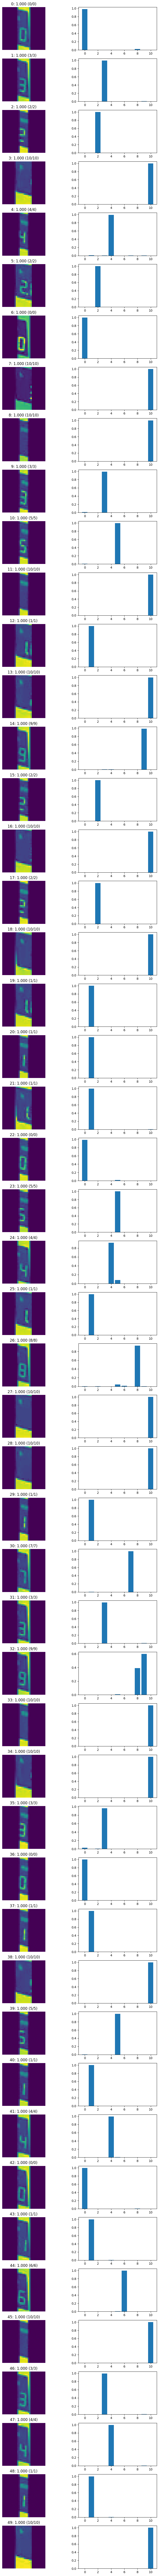

In [ ]:
test_metric='accuracy'     # Metrica utilizzata per ordinare i risultati 'Acc' o 'Jac'
test_image_to_show=50 # Numero di risultati da visualizzare

test_scores=[]
for i in range(test_y_preds.shape[0]):
    score= 1 if y_test[i] == np.argmax(test_y_preds[i]) else 0
    #score=test_y_preds[i][y_test[i]]
    test_scores.append((i,score))

test_scores.sort(key=lambda elem: elem[1],reverse=True)

_, axs = plt.subplots(test_image_to_show, 2,figsize=(10, 3*test_image_to_show))
for i in range(test_image_to_show):
  image_idx=test_scores[i][0]
  axs[i,0].imshow(x_test[image_idx]),axs[i,0].axis('off'),axs[i,0].set_title('%d: %.3f (%d/%d)'%(image_idx,test_scores[i][1], y_test[image_idx], test_y_preds[image_idx].tolist().index(max(test_y_preds[image_idx].tolist()))))
  axs[i,1].bar([0,1,2,3,4,5,6,7,8,9,10],test_y_preds[image_idx])

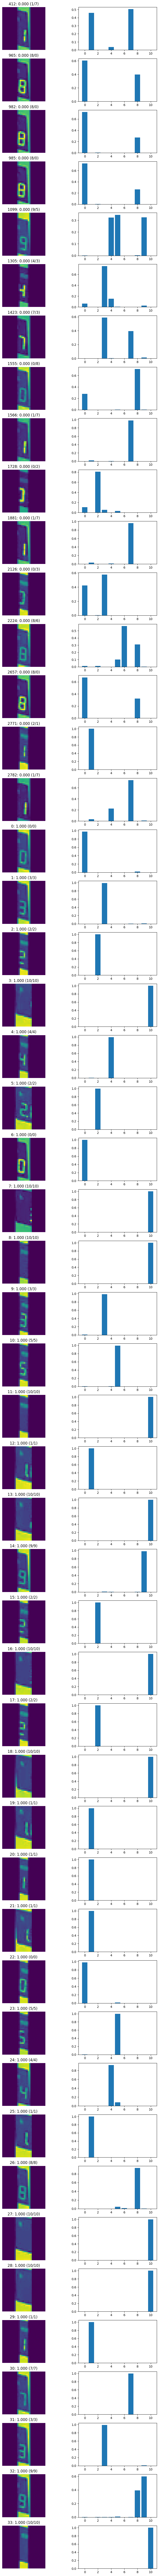

In [ ]:
test_scores.sort(key=lambda elem: elem[1])

_, axs = plt.subplots(test_image_to_show, 2,figsize=(10, 3*test_image_to_show))
for i in range(test_image_to_show):
  image_idx=test_scores[i][0]
  axs[i,0].imshow(x_test[image_idx]),axs[i,0].axis('off'),axs[i,0].set_title('%d: %.3f (%d/%d)'%(image_idx,test_scores[i][1], y_test[image_idx], test_y_preds[image_idx].tolist().index(max(test_y_preds[image_idx].tolist()))))
  axs[i,1].bar([0,1,2,3,4,5,6,7,8,9,10],test_y_preds[image_idx])

In [ ]:
correct = [0,0,0,0,0,0,0,0,0,0,0]
total   = [0,0,0,0,0,0,0,0,0,0,0]
for i, val in enumerate(y_test):
  total[val] += 1
  if val == np.argmax(test_y_preds[i]):
    correct[val] += 1
print(total)
print([(i, j/k) for (i, j), k in zip(enumerate(correct), total)])

[272, 464, 274, 202, 168, 192, 76, 87, 96, 77, 927]
[(0, 0.9889705882352942), (1, 0.9913793103448276), (2, 0.9963503649635036), (3, 1.0), (4, 0.9940476190476191), (5, 1.0), (6, 1.0), (7, 0.9885057471264368), (8, 0.9479166666666666), (9, 0.987012987012987), (10, 1.0)]
